# Extraccion de informacion de reportes medicos

El objetivo de este proyecto es extraer desde un reporte medico que contiene texto libre, informacion del paciente, informacion de la medicacion del paciente, y una imagen de un radiografia de torax, lo siguiente:

- Texto del reporte de-identificado (sin informacion personal del paciente)
- Medicamentos con los que es tratado el paciente
- Prediccion de si en la radiografia es normal o presenta neumonia

Documento a analizar: [Reporte](https://drive.google.com/file/d/15zA5XDQfrVIYZk0gHGLxQqt_up7-NjuP/view?usp=sharing)

Instalar pdfplumber

In [1]:
!pip install pdfplumber

     |████████████████████████████████| 45 kB 1.7 MB/s 
     |████████████████████████████████| 5.6 MB 9.6 MB/s 
     |████████████████████████████████| 139 kB 67.9 MB/s 
     |████████████████████████████████| 1.9 MB 47.4 MB/s 
  Created wheel for pdfplumber: filename=pdfplumber-0.5.28-py3-none-any.whl size=32240 sha256=9313c99df033f65e129b5abb766826cfd680d4b4ad03610f1ca77004a403f969
  Stored in directory: /root/.cache/pip/wheels/f2/b1/a0/c0a77b756d580f53b3806ae0e0b3ec945a8d05fca1d6e10cc1
Successfully built pdfplumber


Importar pdfplumber

In [2]:
import pdfplumber

Función metadatos

In [3]:
def meta_data():
  pdf = pdfplumber.open("/content/sample_data/Report.pdf")
  print("Number of pages: {}".format(len(pdf.pages)))
  print("Document Information")
  print(pdf.metadata)

meta_data()

Number of pages: 1
Document Information
{'Title': 'Report', 'Producer': 'Skia/PDF m97 Google Docs Renderer'}


In [4]:
pdf = pdfplumber.open("/content/sample_data/Report.pdf")
page = pdf.pages[0]
text = page.extract_text()

print(text)


Patient Medical Report
Name: Matias Molinas
Birth date: 10/03/1918
(54) 342- 5678906
Significant Medical History
Mr. Matias Molinas is a 52 y/o accountant with hypercholesterolemia and polycythemia vera
who has been in relatively good health.
Diagnostic: Patient needs to take 50 mg of ibuprofen.
Chest X-Ray:


# 1) De-identificar texto (quitar informacion personal)

### Named entity recognition (NER)

**bert-base-NER** is a fine-tuned BERT model that is ready to use for Named Entity Recognition and achieves state-of-the-art performance for the NER task. It has been trained to recognize four types of entities: location (LOC), organizations (ORG), person (PER) and Miscellaneous (MISC).

Link: https://huggingface.co/dslim/bert-base-NER

In [5]:
!pip install transformers

     |████████████████████████████████| 3.1 MB 5.5 MB/s 
     |████████████████████████████████| 895 kB 59.2 MB/s 
     |████████████████████████████████| 3.3 MB 43.3 MB/s 
     |████████████████████████████████| 596 kB 50.9 MB/s 
     |████████████████████████████████| 59 kB 7.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [6]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER")
model = AutoModelForTokenClassification.from_pretrained("dslim/bert-base-NER")

nlp = pipeline("ner", model=model, tokenizer=tokenizer)

Downloading:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/829 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/413M [00:00<?, ?B/s]

In [7]:
ner_results = nlp(text)
print(ner_results)

[{'entity': 'B-PER', 'score': 0.99962944, 'index': 7, 'word': 'Mat', 'start': 29, 'end': 32}, {'entity': 'I-PER', 'score': 0.89189726, 'index': 8, 'word': '##ias', 'start': 32, 'end': 35}, {'entity': 'I-PER', 'score': 0.9992856, 'index': 9, 'word': 'Mo', 'start': 36, 'end': 38}, {'entity': 'I-PER', 'score': 0.9980028, 'index': 10, 'word': '##lina', 'start': 38, 'end': 42}, {'entity': 'I-PER', 'score': 0.6844336, 'index': 11, 'word': '##s', 'start': 42, 'end': 43}, {'entity': 'B-PER', 'score': 0.99965847, 'index': 37, 'word': 'Mat', 'start': 117, 'end': 120}, {'entity': 'I-PER', 'score': 0.93851656, 'index': 38, 'word': '##ias', 'start': 120, 'end': 123}, {'entity': 'I-PER', 'score': 0.9995798, 'index': 39, 'word': 'Mo', 'start': 124, 'end': 126}, {'entity': 'I-PER', 'score': 0.9988227, 'index': 40, 'word': '##lina', 'start': 126, 'end': 130}, {'entity': 'I-PER', 'score': 0.9968751, 'index': 41, 'word': '##s', 'start': 130, 'end': 131}]


In [8]:
for i, val in enumerate(ner_results):
    print (i, ",",val)

0 , {'entity': 'B-PER', 'score': 0.99962944, 'index': 7, 'word': 'Mat', 'start': 29, 'end': 32}
1 , {'entity': 'I-PER', 'score': 0.89189726, 'index': 8, 'word': '##ias', 'start': 32, 'end': 35}
2 , {'entity': 'I-PER', 'score': 0.9992856, 'index': 9, 'word': 'Mo', 'start': 36, 'end': 38}
3 , {'entity': 'I-PER', 'score': 0.9980028, 'index': 10, 'word': '##lina', 'start': 38, 'end': 42}
4 , {'entity': 'I-PER', 'score': 0.6844336, 'index': 11, 'word': '##s', 'start': 42, 'end': 43}
5 , {'entity': 'B-PER', 'score': 0.99965847, 'index': 37, 'word': 'Mat', 'start': 117, 'end': 120}
6 , {'entity': 'I-PER', 'score': 0.93851656, 'index': 38, 'word': '##ias', 'start': 120, 'end': 123}
7 , {'entity': 'I-PER', 'score': 0.9995798, 'index': 39, 'word': 'Mo', 'start': 124, 'end': 126}
8 , {'entity': 'I-PER', 'score': 0.9988227, 'index': 40, 'word': '##lina', 'start': 126, 'end': 130}
9 , {'entity': 'I-PER', 'score': 0.9968751, 'index': 41, 'word': '##s', 'start': 130, 'end': 131}


# 2) Obtener medicamentos del paciente

### Biomedical Term Extraction
Extracción de Entidades Médicas
Herramienta para reconocimiento de entidades biomédicas y de normalización de múltiples tipos (BERN) que utiliza modelos NER basados en redes neuronales (BioBERT (Lee et al., 2019)) para reconocer entidades y descubrir nuevas entidades.

web: https://bern.korea.ac.kr/

In [9]:
import requests

In [10]:
def query_raw(text, url="https://bern.korea.ac.kr/plain"):
  return requests.post(url, data={'sample_text': text}).json()

In [11]:
def term_extraction(text, out, type):

  denotations= out['denotations']
  relavent_terms= []

  if type=='drug':
    drug_terms= []
    for i in denotations:
      if i['obj']== 'drug':
        drug_terms.append((i['span']['begin'],i['span']['end']))
    
    for i in drug_terms:
      start=i[0]
      end=i[1]
      relavent_terms.append(text[start:end])

  return(relavent_terms)

In [12]:
out= query_raw(text)
print(out)
print("Los medicamentos tomados por el pacientes son:", term_extraction(text, out, 'drug'))

{'project': 'BERN', 'sourcedb': '', 'sourceid': '833d0b917506741c57d436adcfb80b337b4ec80f96f32b7c929d8261-Thread-20726732', 'text': 'Patient Medical Report Name: Matias Molinas Birth date: 10/03/1918 (54) 342- 5678906 Significant Medical History Mr. Matias Molinas is a 52 y/o accountant with hypercholesterolemia and polycythemia vera who has been in relatively good health. Diagnostic: Patient needs to take 50 mg of ibuprofen. Chest X-Ray:', 'denotations': [{'id': ['MESH:D006937', 'BERN:256192501'], 'span': {'begin': 160, 'end': 180}, 'obj': 'disease'}, {'id': ['OMIM:263300', 'MESH:D011087', 'BERN:106906601'], 'span': {'begin': 185, 'end': 202}, 'obj': 'disease'}, {'id': ['CHEBI:43415', 'BERN:5880103'], 'span': {'begin': 286, 'end': 295}, 'obj': 'drug'}], 'timestamp': 'Sun Nov 21 12:30:29 +0000 2021', 'logits': {'disease': [[{'start': 160, 'end': 180, 'id': 'MESH:D006937\tBERN:256192501'}, 0.9999997615814209], [{'start': 185, 'end': 202, 'id': 'OMIM:263300\tMESH:D011087\tBERN:106906601'

# 3) Predecir si la radiografia corresponde a un paciente normal o con neumonia

Extraer imagen desde PDF



In [13]:
!pip install PyMuPDF Pillow

     |████████████████████████████████| 8.7 MB 4.6 MB/s 


In [14]:
import fitz # PyMuPDF
import io
from PIL import Image

In [15]:
# file path you want to extract images from
file = "/content/sample_data/Report.pdf"
# open the file
pdf_file = fitz.open(file)

In [16]:
# iterate over PDF pages
for page_index in range(len(pdf_file)):
    # get the page itself
    page = pdf_file[page_index]
    image_list = page.get_images()
    # printing number of images found in this page
    if image_list:
        print(f"[+] Found a total of {len(image_list)} images in page {page_index}")
    else:
        print("[!] No images found on page", page_index)
    for image_index, img in enumerate(page.get_images(), start=1):
        # get the XREF of the image
        xref = img[0]
        # extract the image bytes
        base_image = pdf_file.extract_image(xref)
        image_bytes = base_image["image"]
        # get the image extension
        image_ext = base_image["ext"]
        # load it to PIL
        image = Image.open(io.BytesIO(image_bytes))
        # save it to local disk
        image.save(open(f"image{page_index+1}_{image_index}.{image_ext}", "wb"))

[+] Found a total of 1 images in page 0


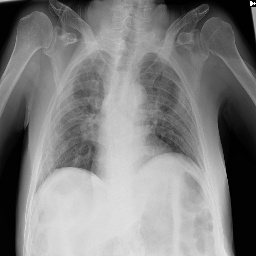

In [17]:
image_project = Image.open('/content/image1_1.png')
image_project.show()
display(image_project)


### Pneumonia Classification on TPU
**Author:** Amy MiHyun Jang  
**Date created:** 2020/07/28  
**Last modified:** 2020/08/24  
**Description:** Medical image classification on TPU.

How to build an X-ray image classification model to predict whether an X-ray scan shows presence of pneumonia.

In [18]:
import re
import os
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
    print("Device:", tpu.master())
    strategy = tf.distribute.TPUStrategy(tpu)
except:
    strategy = tf.distribute.get_strategy()
print("Number of replicas:", strategy.num_replicas_in_sync)

INFO:absl:Entering into master device scope: /job:worker/replica:0/task:0/device:CPU:0


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.57.209.10:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.57.209.10:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


Device: grpc://10.57.209.10:8470
INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


Number of replicas: 8


We need a Google Cloud link to our data to load the data using a TPU. Below, we define key configuration parameters we'll use in this example. To run on TPU, this example must be on Colab with the TPU runtime selected.

In [19]:
AUTOTUNE = tf.data.AUTOTUNE
BATCH_SIZE = 25 * strategy.num_replicas_in_sync
IMAGE_SIZE = [180, 180]
CLASS_NAMES = ["NORMAL", "PNEUMONIA"]

### Load the data
The Chest X-ray data we are using from Cell divides the data into training and test files. Let's first load in the training TFRecords.

In [20]:
train_images = tf.data.TFRecordDataset(
    "gs://download.tensorflow.org/data/ChestXRay2017/train/images.tfrec"
)
train_paths = tf.data.TFRecordDataset(
    "gs://download.tensorflow.org/data/ChestXRay2017/train/paths.tfrec"
)

ds = tf.data.Dataset.zip((train_images, train_paths))

Let's count how many healthy/normal chest X-rays we have and how many pneumonia chest X-rays we have:

In [21]:
COUNT_NORMAL = len(
    [
        filename
        for filename in train_paths
        if "NORMAL" in filename.numpy().decode("utf-8")
    ]
)
print("Normal images count in training set: " + str(COUNT_NORMAL))

COUNT_PNEUMONIA = len(
    [
        filename
        for filename in train_paths
        if "PNEUMONIA" in filename.numpy().decode("utf-8")
    ]
)
print("Pneumonia images count in training set: " + str(COUNT_PNEUMONIA))

Normal images count in training set: 1349
Pneumonia images count in training set: 3883


Notice that there are way more images that are classified as pneumonia than normal. This shows that we have an imbalance in our data. We will correct for this imbalance later on in our notebook.

We want to map each filename to the corresponding (image, label) pair. The following methods will help us do that.

As we only have two labels, we will encode the label so that 1 or True indicates pneumonia and 0 or False indicates normal.

In [22]:
def get_label(file_path):
    # convert the path to a list of path components
    parts = tf.strings.split(file_path, "/")
    # The second to last is the class-directory
    return parts[-2] == "PNEUMONIA"


def decode_img(img):
    # convert the compressed string to a 3D uint8 tensor
    img = tf.image.decode_jpeg(img, channels=3)
    # resize the image to the desired size.
    return tf.image.resize(img, IMAGE_SIZE)


def process_path(image, path):
    label = get_label(path)
    # load the raw data from the file as a string
    img = decode_img(image)
    return img, label


ds = ds.map(process_path, num_parallel_calls=AUTOTUNE)

Let's split the data into a training and validation datasets.

In [23]:
ds = ds.shuffle(10000)
train_ds = ds.take(4200)
val_ds = ds.skip(4200)

Let's visualize the shape of an (image, label) pair.

In [24]:
for image, label in train_ds.take(1):
    print("Image shape: ", image.numpy().shape)
    print("Label: ", label.numpy())

Image shape:  (180, 180, 3)
Label:  True


Load and format the test data as well.

In [25]:
test_images = tf.data.TFRecordDataset(
    "gs://download.tensorflow.org/data/ChestXRay2017/test/images.tfrec"
)
test_paths = tf.data.TFRecordDataset(
    "gs://download.tensorflow.org/data/ChestXRay2017/test/paths.tfrec"
)
test_ds = tf.data.Dataset.zip((test_images, test_paths))

test_ds = test_ds.map(process_path, num_parallel_calls=AUTOTUNE)
test_ds = test_ds.batch(BATCH_SIZE)

In [26]:
test_ds

<BatchDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.bool)>

### Visualize the dataset
First, let's use buffered prefetching so we can yield data from disk without having I/O become blocking.

Please note that large image datasets should not be cached in memory. We do it here because the dataset is not very large and we want to train on TPU.

In [27]:
def prepare_for_training(ds, cache=True):
    # This is a small dataset, only load it once, and keep it in memory.
    # use `.cache(filename)` to cache preprocessing work for datasets that don't
    # fit in memory.
    if cache:
        if isinstance(cache, str):
            ds = ds.cache(cache)
        else:
            ds = ds.cache()

    ds = ds.batch(BATCH_SIZE)

    # `prefetch` lets the dataset fetch batches in the background while the model
    # is training.
    ds = ds.prefetch(buffer_size=AUTOTUNE)

    return ds

Call the next batch iteration of the training data.

In [28]:
train_ds = prepare_for_training(train_ds)
val_ds = prepare_for_training(val_ds)

image_batch, label_batch = next(iter(train_ds))

Define the method to show the images in the batch.

In [29]:
def show_batch(image_batch, label_batch):
    plt.figure(figsize=(10, 10))
    for n in range(25):
        ax = plt.subplot(5, 5, n + 1)
        plt.imshow(image_batch[n] / 255)
        if label_batch[n]:
            plt.title("PNEUMONIA")
        else:
            plt.title("NORMAL")
        plt.axis("off")

As the method takes in NumPy arrays as its parameters, call the numpy function on the batches to return the tensor in NumPy array form.

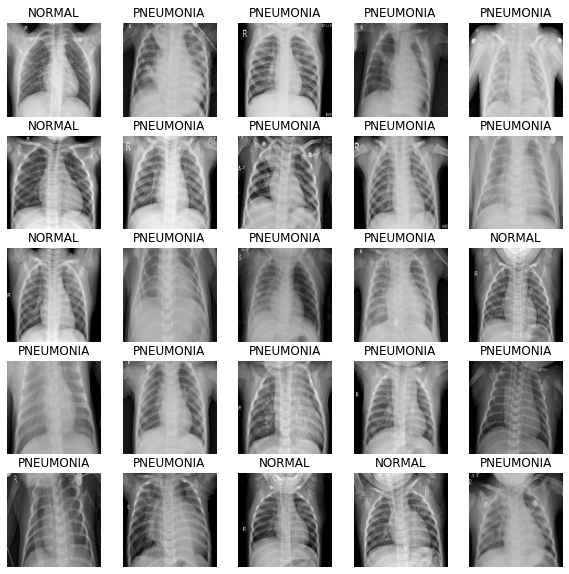

In [30]:
show_batch(image_batch.numpy(), label_batch.numpy())

### Build the CNN
To make our model more modular and easier to understand, let's define some blocks. As we're building a convolution neural network, we'll create a convolution block and a dense layer block.

The architecture for this CNN has been inspired by this
[article](https://towardsdatascience.com/deep-learning-for-detecting-pneumonia-from-x-ray-images-fc9a3d9fdba8).

In [31]:
from tensorflow import keras
from tensorflow.keras import layers


def conv_block(filters, inputs):
    x = layers.SeparableConv2D(filters, 3, activation="relu", padding="same")(inputs)
    x = layers.SeparableConv2D(filters, 3, activation="relu", padding="same")(x)
    x = layers.BatchNormalization()(x)
    outputs = layers.MaxPool2D()(x)

    return outputs


def dense_block(units, dropout_rate, inputs):
    x = layers.Dense(units, activation="relu")(inputs)
    x = layers.BatchNormalization()(x)
    outputs = layers.Dropout(dropout_rate)(x)

    return outputs

The following method will define the function to build our model for us.

The images originally have values that range from [0, 255]. CNNs work better with smaller numbers so we will scale this down for our input.

The Dropout layers are important, as they reduce the likelikhood of the model overfitting. We want to end the model with a Dense layer with one node, as this will be the binary output that determines if an X-ray shows presence of pneumonia.

In [32]:
def build_model():
    inputs = keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))
    x = layers.Rescaling(1.0 / 255)(inputs)
    x = layers.Conv2D(16, 3, activation="relu", padding="same")(x)
    x = layers.Conv2D(16, 3, activation="relu", padding="same")(x)
    x = layers.MaxPool2D()(x)

    x = conv_block(32, x)
    x = conv_block(64, x)

    x = conv_block(128, x)
    x = layers.Dropout(0.2)(x)

    x = conv_block(256, x)
    x = layers.Dropout(0.2)(x)

    x = layers.Flatten()(x)
    x = dense_block(512, 0.7, x)
    x = dense_block(128, 0.5, x)
    x = dense_block(64, 0.3, x)

    outputs = layers.Dense(1, activation="sigmoid")(x)

    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

### Correct for data imbalance
We saw earlier in this example that the data was imbalanced, with more images classified as pneumonia than normal. We will correct for that by using class weighting:

In [33]:
initial_bias = np.log([COUNT_PNEUMONIA / COUNT_NORMAL])
print("Initial bias: {:.5f}".format(initial_bias[0]))

TRAIN_IMG_COUNT = COUNT_NORMAL + COUNT_PNEUMONIA
weight_for_0 = (1 / COUNT_NORMAL) * (TRAIN_IMG_COUNT) / 2.0
weight_for_1 = (1 / COUNT_PNEUMONIA) * (TRAIN_IMG_COUNT) / 2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print("Weight for class 0: {:.2f}".format(weight_for_0))
print("Weight for class 1: {:.2f}".format(weight_for_1))

Initial bias: 1.05724
Weight for class 0: 1.94
Weight for class 1: 0.67


The weight for class 0 (Normal) is a lot higher than the weight for class 1 (Pneumonia). Because there are less normal images, each normal image will be weighted more to balance the data as the CNN works best when the training data is balanced.

## Train the model

### Defining callbacks
The checkpoint callback saves the best weights of the model, so next time we want to use the model, we do not have to spend time training it. The early stopping callback stops the training process when the model starts becoming stagnant, or even worse, when the model starts overfitting.

In [34]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("xray_model.h5", save_best_only=True)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=10, restore_best_weights=True
)

We also want to tune our learning rate. Too high of a learning rate will cause the model to diverge. Too small of a learning rate will cause the model to be too slow. We implement the exponential learning rate scheduling method below.

In [35]:
initial_learning_rate = 0.015
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
)

### Fit the model
For our metrics, we want to include precision and recall as they will provide use with a more informed picture of how good our model is. Accuracy tells us what fraction of the labels is correct. Since our data is not balanced, accuracy might give a skewed sense of a good model (i.e. a model that always predicts PNEUMONIA will be 74% accurate but is not a good model).

Precision is the number of true positives (TP) over the sum of TP and false positives (FP). It shows what fraction of labeled positives are actually correct.

Recall is the number of TP over the sum of TP and false negatves (FN). It shows what fraction of actual positives are correct.

Since there are only two possible labels for the image, we will be using the binary crossentropy loss. When we fit the model, remember to specify the class weights, which we defined earlier. Because we are using a TPU, training will be quick - less than 2 minutes.

In [36]:
with strategy.scope():
    model = build_model()

    METRICS = [
        tf.keras.metrics.BinaryAccuracy(),
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall"),
    ]
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
        loss="binary_crossentropy",
        metrics=METRICS,
    )

history = model.fit(
    train_ds,
    epochs=100,
    validation_data=val_ds,
    class_weight=class_weight,
    callbacks=[checkpoint_cb, early_stopping_cb],
)

Epoch 1/100


INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond/Identity:0' shape=(None, 180, 180, 3) dtype=float32>, <tf.Tensor 'cond/Identity_8:0' shape=(None,) dtype=bool>, <tf.Tensor 'cond/Identity_16:0' shape=(None,) dtype=float32>]


Instructions for updating:
use `experimental_local_results` instead.


Instructions for updating:
use `experimental_local_results` instead.
INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond/Identity:0' shape=(None, 180, 180, 3) dtype=float32>, <tf.Tensor 'cond/Identity_8:0' shape=(None,) dtype=bool>, <tf.Tensor 'cond/Identity_16:0' shape=(None,) dtype=float32>]


     21/Unknown - 24s 91ms/step - loss: 0.5545 - binary_accuracy: 0.7186 - precision: 0.9058 - recall: 0.6934

INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond/Identity:0' shape=(None, 180, 180, 3) dtype=float32>, <tf.Tensor 'cond/Identity_8:0' shape=(None,) dtype=bool>]


21/21 [==============================] - 34s 596ms/step - loss: 0.5545 - binary_accuracy: 0.7186 - precision: 0.9058 - recall: 0.6934 - val_loss: 8.0927 - val_binary_accuracy: 0.7258 - val_precision: 0.7258 - val_recall: 1.0000
Epoch 2/100
21/21 [==============================] - 3s 167ms/step - loss: 0.2948 - binary_accuracy: 0.8826 - precision: 0.9553 - recall: 0.8834 - val_loss: 60.4349 - val_binary_accuracy: 0.7258 - val_precision: 0.7258 - val_recall: 1.0000
Epoch 3/100
21/21 [==============================] - 3s 165ms/step - loss: 0.2342 - binary_accuracy: 0.9071 - precision: 0.9694 - recall: 0.9036 - val_loss: 10.1380 - val_binary_accuracy: 0.7258 - val_precision: 0.7258 - val_recall: 1.0000
Epoch 4/100
21/21 [==============================] - 4s 215ms/step - loss: 0.1960 - binary_accuracy: 0.9214 - precision: 0.9729 - recall: 0.9199 - val_loss: 3.3623 - val_binary_accuracy: 0.7238 - val_precision: 0.7270 - val_recall: 0.9920
Epoch 5/100
21/21 [==============================] - 

### Visualizing model performance
Let's plot the model accuracy and loss for the training and the validating set. Note that no random seed is specified for this notebook. For your notebook, there might be slight variance.

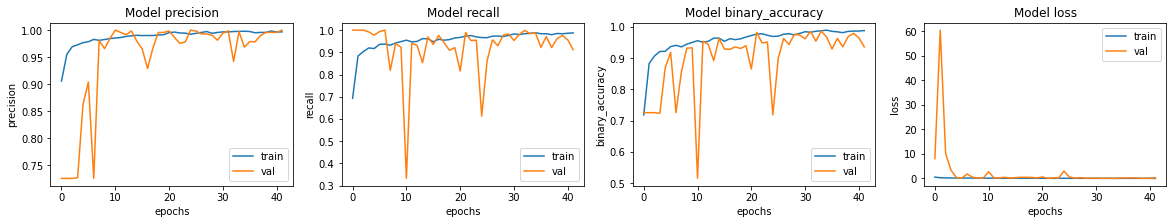

In [37]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(["precision", "recall", "binary_accuracy", "loss"]):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history["val_" + met])
    ax[i].set_title("Model {}".format(met))
    ax[i].set_xlabel("epochs")
    ax[i].set_ylabel(met)
    ax[i].legend(["train", "val"])

### Predict and evaluate results
Let's evaluate the model on our test data!

In [38]:
model.evaluate(test_ds, return_dict=True)

4/4 [==============================] - 6s 943ms/step - loss: 2.0712 - binary_accuracy: 0.7772 - precision: 0.7418 - recall: 0.9872


{'binary_accuracy': 0.7772436141967773,
 'loss': 2.0711820125579834,
 'precision': 0.741811215877533,
 'recall': 0.9871795177459717}

We see that our accuracy on our test data is lower than the accuracy for our validating set. This may indicate overfitting.

Our recall is greater than our precision, indicating that almost all pneumonia images are correctly identified but some normal images are falsely identified. We should aim to increase our precision.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  This is separate from the ipykernel package so we can avoid doing imports until

INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond/Identity:0' shape=(None, 180, 180, 3) dtype=float32>, <tf.Tensor 'cond/Identity_8:0' shape=(None,) dtype=bool>]


This image is 80.29 percent NORMAL
This image is 19.71 percent PNEUMONIA


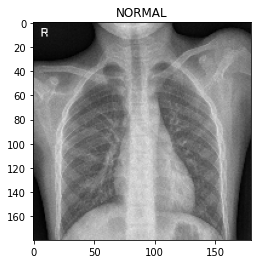

In [39]:
for image, label in test_ds.take(1):
    plt.imshow(image[9] / 255.0)
    plt.title(CLASS_NAMES[label[9].numpy()])

prediction = model.predict(test_ds.take(1))[9]
scores = [1 - prediction, prediction]

for score, name in zip(scores, CLASS_NAMES):
    print("This image is %.2f percent %s" % ((100 * score), name))

In [40]:
from keras.preprocessing import image

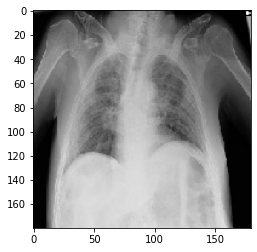

In [41]:
test_img =image.load_img('/content/image1_1.png',target_size=(180,180))
plt.imshow(test_img)

In [42]:
x = image.img_to_array(test_img)
x = np.expand_dims(x, axis=0)
# x /= 255. 


In [43]:
test_predict =model.predict(x)

INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond/Identity:0' shape=(None, 180, 180, 3) dtype=float32>]


In [44]:
test_predict

array([[0.9980575]], dtype=float32)

In [45]:
scores = [1 - test_predict, test_predict]

In [46]:
for score, name in zip(scores, CLASS_NAMES):
    print("This image is %.2f percent %s" % ((100 * score), name))

This image is 0.19 percent NORMAL
This image is 99.81 percent PNEUMONIA


**La radiografía corresponde a un paciente con Neumonía** ⚕
